In [6]:
# ИСПРАВЛЕННЫЙ ПУТЬ: Используйте этот код вместо старого
import os
BASE_DIR = os.getcwd()
file_path = os.path.join(BASE_DIR, "data.csv")
print(f"Используется путь: {file_path}")


Используется путь: d:\finbert_part\data.csv


In [7]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter



df = pd.read_csv(file_path)

df.to_csv(file_path, index=False)
print(f"Датасет сохранен в {file_path}")
print(f"Размер датасета: {df.shape}")
print(f"Первые 5 строк:\n{df.head()}")

Датасет сохранен в d:\finbert_part\data.csv
Размер датасета: (106355, 2)
Первые 5 строк:
                                                text     emotion
0  i feel rather funny ending with so many dupes ...         fun
1                     i feel surprised by the result    surprise
2                    i am officially feeling festive     neutral
3  i suddenly found myself standing before this w...    surprise
4  i look at the meager pile of food i purchased ...  enthusiasm


In [8]:
# Датасет уже загружен в предыдущей ячейке как df
# Здесь можно выполнить дополнительный анализ
if 'df' in globals():
    print(f"Информация о датасете:")
    print(f"Количество строк: {len(df)}")
    print(f"Количество столбцов: {len(df.columns)}")
    print(f"Названия столбцов: {list(df.columns)}")
    print(f"\nИнформация о данных:")
    print(df.info())

Информация о датасете:
Количество строк: 106355
Количество столбцов: 2
Названия столбцов: ['text', 'emotion']

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106355 entries, 0 to 106354
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     106355 non-null  object
 1   emotion  106355 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB
None


In [9]:
# Пример работы с датасетом
if 'df' in globals():
    print("Примеры записей из датасета:")
    print(df.head(10))
    print(f"\nСтатистика:")
    print(df.describe())

Примеры записей из датасета:
                                                text     emotion
0  i feel rather funny ending with so many dupes ...         fun
1                     i feel surprised by the result    surprise
2                    i am officially feeling festive     neutral
3  i suddenly found myself standing before this w...    surprise
4  i look at the meager pile of food i purchased ...  enthusiasm
5  I, for one, am thrilled that Christ works outs...   happiness
6  i hate that she has the power to make me feel ...        hate
7                            i feel like i missed it     neutral
8  i have personally experienced this gut wrenchi...     sadness
9  i hate feeling that people see me as ugly but ...        hate

Статистика:
                                                     text emotion
count                                              106355  106355
unique                                              80786      11
top     RT, follow and WIN one of the 5 speci

СТАТИСТИКА ПО ЭМОЦИЯМ

Общее количество записей: 106355
Количество уникальных эмоций: 11

Частота каждой эмоции:
emotion
fun           10000
surprise      10000
enthusiasm    10000
anger         10000
happiness     10000
hate          10000
love          10000
relief        10000
sadness        9999
neutral        9998
empty          6358
Name: count, dtype: int64

Процентное распределение:
fun            :  10000 ( 9.40%)
surprise       :  10000 ( 9.40%)
enthusiasm     :  10000 ( 9.40%)
anger          :  10000 ( 9.40%)
happiness      :  10000 ( 9.40%)
hate           :  10000 ( 9.40%)
love           :  10000 ( 9.40%)
relief         :  10000 ( 9.40%)
sadness        :   9999 ( 9.40%)
neutral        :   9998 ( 9.40%)
empty          :   6358 ( 5.98%)


C:\Users\foksm\AppData\Local\Temp\ipykernel_17072\844101637.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='emotion', order=emotion_counts.index, ax=ax1, palette='viridis')


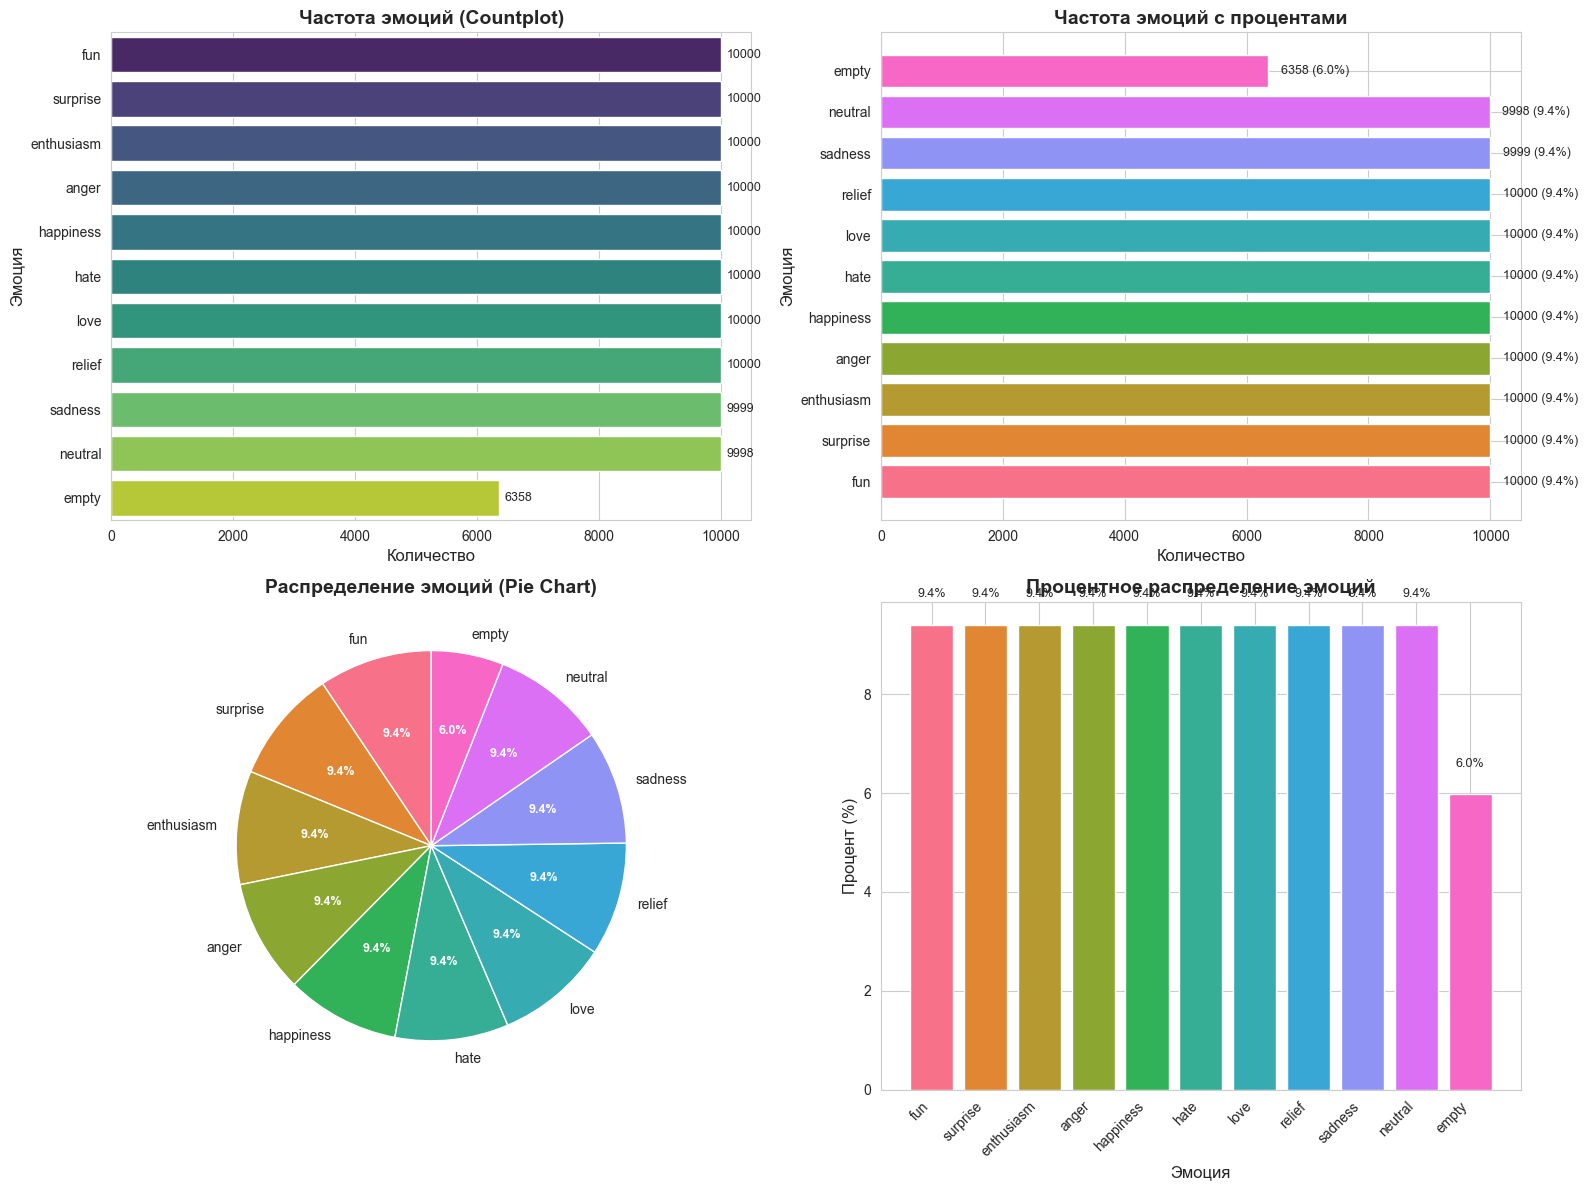


ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА
Самая частая эмоция: fun (10000 записей, 9.40%)
Самая редкая эмоция: empty (6358 записей, 5.98%)
Разница между самой частой и редкой: 3642 записей
Медианная частота: 10000 записей
Средняя частота: 9669 записей


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Настройка стиля seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Проверка наличия датасета
if 'df' in globals():
    # 1. Подсчет частоты каждой эмоции
    emotion_counts = df['emotion'].value_counts()
    emotion_percentages = df['emotion'].value_counts(normalize=True) * 100
    
    print("=" * 60)
    print("СТАТИСТИКА ПО ЭМОЦИЯМ")
    print("=" * 60)
    print(f"\nОбщее количество записей: {len(df)}")
    print(f"Количество уникальных эмоций: {df['emotion'].nunique()}")
    print(f"\nЧастота каждой эмоции:")
    print(emotion_counts)
    print(f"\nПроцентное распределение:")
    for emotion, count in emotion_counts.items():
        percentage = emotion_percentages[emotion]
        print(f"{emotion:15s}: {count:6d} ({percentage:5.2f}%)")
    
    # 2. График частоты (Countplot)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # График 1: Countplot (вертикальный)
    ax1 = axes[0, 0]
    sns.countplot(data=df, y='emotion', order=emotion_counts.index, ax=ax1, palette='viridis')
    ax1.set_title('Частота эмоций (Countplot)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Количество', fontsize=12)
    ax1.set_ylabel('Эмоция', fontsize=12)
    # Добавляем значения на столбцы
    for i, v in enumerate(emotion_counts.values):
        ax1.text(v + 100, i, str(v), va='center', fontsize=9)
    
    # График 2: Countplot (горизонтальный с процентами)
    ax2 = axes[0, 1]
    colors = sns.color_palette("husl", len(emotion_counts))
    bars = ax2.barh(range(len(emotion_counts)), emotion_counts.values, color=colors)
    ax2.set_yticks(range(len(emotion_counts)))
    ax2.set_yticklabels(emotion_counts.index)
    ax2.set_title('Частота эмоций с процентами', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Количество', fontsize=12)
    ax2.set_ylabel('Эмоция', fontsize=12)
    # Добавляем значения и проценты
    for i, (v, p) in enumerate(zip(emotion_counts.values, emotion_percentages.values)):
        ax2.text(v + 200, i, f'{v} ({p:.1f}%)', va='center', fontsize=9)
    
    # График 3: Круговая диаграмма
    ax3 = axes[1, 0]
    wedges, texts, autotexts = ax3.pie(emotion_counts.values, 
                                        labels=emotion_counts.index,
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        colors=colors)
    ax3.set_title('Распределение эмоций (Pie Chart)', fontsize=14, fontweight='bold')
    # Улучшаем читаемость текста
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    # График 4: Столбчатая диаграмма с процентами
    ax4 = axes[1, 1]
    bars = ax4.bar(range(len(emotion_counts)), emotion_percentages.values, color=colors)
    ax4.set_xticks(range(len(emotion_counts)))
    ax4.set_xticklabels(emotion_counts.index, rotation=45, ha='right')
    ax4.set_title('Процентное распределение эмоций', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Процент (%)', fontsize=12)
    ax4.set_xlabel('Эмоция', fontsize=12)
    # Добавляем значения на столбцы
    for i, (v, p) in enumerate(zip(emotion_counts.values, emotion_percentages.values)):
        ax4.text(i, p + 0.5, f'{p:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Дополнительная статистика
    print("\n" + "=" * 60)
    print("ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА")
    print("=" * 60)
    print(f"Самая частая эмоция: {emotion_counts.index[0]} ({emotion_counts.iloc[0]} записей, {emotion_percentages.iloc[0]:.2f}%)")
    print(f"Самая редкая эмоция: {emotion_counts.index[-1]} ({emotion_counts.iloc[-1]} записей, {emotion_percentages.iloc[-1]:.2f}%)")
    print(f"Разница между самой частой и редкой: {emotion_counts.iloc[0] - emotion_counts.iloc[-1]} записей")
    print(f"Медианная частота: {emotion_counts.median():.0f} записей")
    print(f"Средняя частота: {emotion_counts.mean():.0f} записей")
else:
    print("Ошибка: Датасет 'df' не найден. Запустите сначала ячейку с загрузкой данных.")
